# Proyecto Individual nro 2. Data Analytics 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
import json

In [2]:
df = pd.read_csv('AccidentesAviones1.csv')
df.head(3)

,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,Fort Myer,Military,Wright Brothers,1.0,0.5
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,Juvisy-sur-Orge,Passenger,Wright Brothers,0.0,0.0
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,Atlantic City,Military,other,0.0,0.0


### Diccionario

- Date - Fecha del accidente<br>
- Time - Hora local, en 24 h. en el formato hh:mm<br>
- Location - Ubicación del accidente<br>
- Operator - Aerolínea u operador de la aeronave<br>
- Flight -  Número de vuelo asignado por el operador de la aeronave<br>
- Route - Ruta completa o parcial volada antes del accidente<br>
- Type - Tipo de aeronave<br>
- Registration - Matrícula OACI de la aeronave<br>
- cn/In - Número de construcción o de serie / Número de línea o de fuselaje<br>
- Total Aboard - Total de personas a bordo<br>
- Passengers Aboard - Pasajeros a bordo<br>
- Crew Aboard - Tripulación a bordo<br>
- Total Fatalities - Muertes totales<br>
- Passengers Fatalities - Muertes de pasajeros<br>
- Crew Fatalities - Muertes de la tripulación<br>
- Ground - Total de muertos en el suelo, muertos por daño colateral<br>
- Summary - Breve descripción del accidente y la causa, si se conoce<br>

#### Medidas descriptivas

In [7]:
df.describe()

,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Survivors,Survival_Rate
count,4986.000000,4782.000000,4784.000000,4986.000000,4765.000000,4766.000000,4986.000000,4986.000000
mean,31.152427,26.905270,4.523411,22.341957,18.971459,3.591691,8.810469,0.182291
std,45.492081,44.049904,3.758032,35.035543,34.085492,3.177420,30.653307,0.312307
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,3.750000,0.250000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,516.000000,1.000000


- Tenemos algunos valores que es necesario analizar puesto que según fuentes el número máximo de personas transportadas en un avión es de 525
- A su vez la tripulación como máximo es de un número de 10 personas entre pilotos, copilotos y asistentes de vuelo, aunque puede variar
- Las fatalidades deben analizarse en consecuencia a estos números también

#### Histogramas

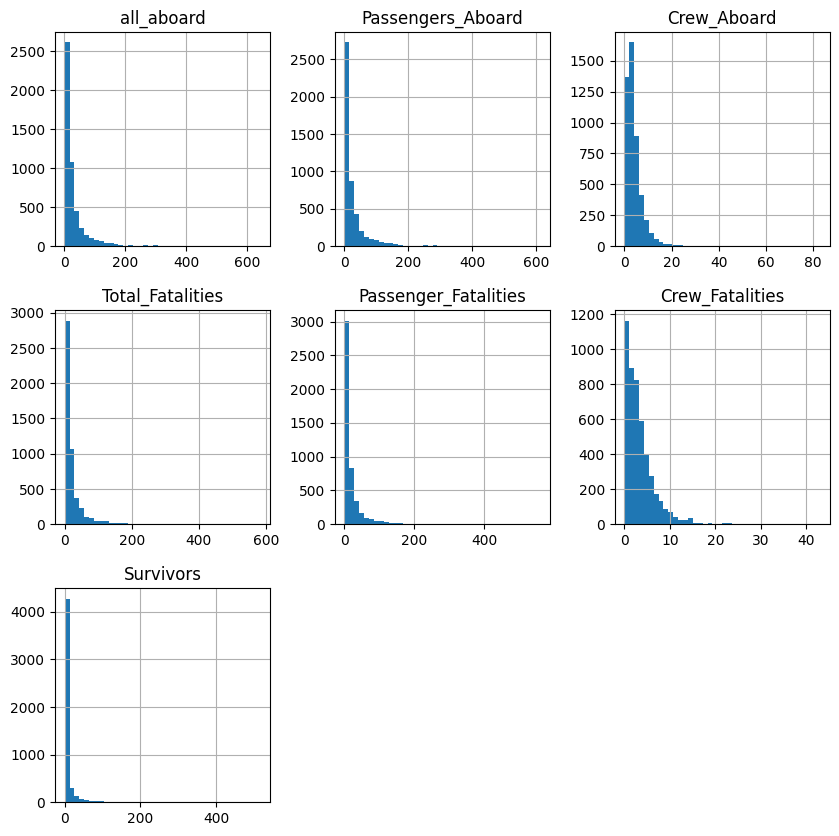

In [9]:
columns = ['all_aboard', 'Passengers_Aboard', 'Crew_Aboard', 'Total_Fatalities', 'Passenger_Fatalities', 'Crew_Fatalities', 'Survivors']
df[columns].hist(bins=40, figsize= (10, 10))
plt.show()

Todas las distribuciones presentan un gran sesgo a la derecha.La mayoría de los valores tienden a estar en el lado izquierdo de la distribución, y hay algunos valores extremadamente altos que hacen que la cola derecha sea larga.

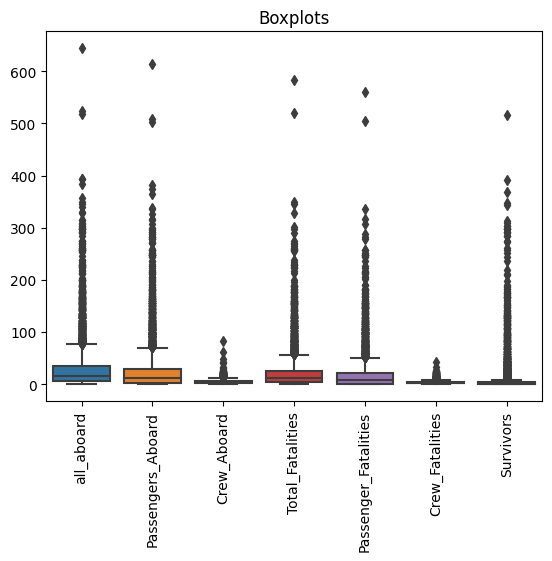

In [11]:
sns.boxplot(data=df[['all_aboard', 'Passengers_Aboard', 'Crew_Aboard', 'Total_Fatalities', 'Passenger_Fatalities', 'Crew_Fatalities', 'Survivors']])
plt.title('Boxplots')
plt.xticks(rotation=90)
plt.show()

 Observamos  presencia de outliers en las columnas que nos interesan. 

Vamos a ver en detalle un poco mas esos outliers para ver que significan 

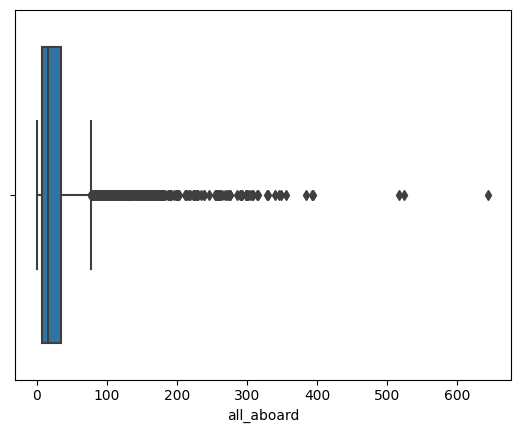

El rango intercuartil (IQR) de all_aboard es 28.0
-35.0 77.0


C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_5244\2995319375.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['all_aboard'], 25,
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_5244\2995319375.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['all_aboard'], 75,


,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate
359,1935-02-12,NaN,"Off Point Sur, Californiia",Military - US Navy,NaN,Goodyear-Zeppelin U.S.S. Macon (airship),83.0,0.0,83.0,2,0.0,2.0,The airship suffered structural failure in a s...,United States,Off Point Sur,Military,other,81.0,0.975904
455,1937-05-06,19:25:00,"Lakehurst, New Jersey",Deutsche Zeppelin Reederei,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,97.0,36.0,61.0,35,13.0,22.0,The airship Hindenburg caught fire and burned ...,United States,Lakehurst,Passenger,other,62.0,0.639175
1106,1949-06-07,00:25:00,"San Juan, Puerto Rico",Strato Freight,San Juan - Miami,Curtiss C-46D-5-CU,81.0,75.0,6.0,53,52.0,1.0,The aircraft crashed into the Atlantic Ocean d...,Puerto Rico,San Juan,Passenger,other,28.0,0.345679
1154,1950-03-12,14:50:00,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,During the approach to Runway 28 at Llandow Ai...,other,"Llandow Airport, Cardiff",Passenger,Avro Canada,3.0,0.036145
1348,1952-12-20,NaN,"Moses Lake, Washington",Military - U.S. Air Force,NaN,Douglas C-124A Globemaster,115.0,105.0,10.0,87,82.0,5.0,Within two minutes after takeoff the aircraft ...,United States,Moses Lake,Military,Douglas Aircraft Company,28.0,0.243478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,2020-01-08,06:18:00,"Near Shahriah, Iran",Ukraine International Airlines,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,The plane took off from Tehran International A...,Iran,Near Shahriah,Passenger,Boeing,0.0,0.000000
4973,2020-02-05,18:19:00,"Istanbul, Turkey",Pegasus Airlines,Izmir - Istanbul,Boeing 737-86J,177.0,171.0,6.0,3,3.0,0.0,While landing duriing high winds and heavey ra...,Turkey,Istanbul,Passenger,Boeing,174.0,0.983051
4975,2020-05-22,14:40:00,"Karachi, Pakistan",Pakistan International Airline,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,"While landing, the aircraft scraped the runway...",Pakistan,Karachi,Passenger,Airbus,2.0,0.020202
4976,2020-08-07,19:14:00,"Calicut, India",Air India Exppress,Dubai - Calicut,Boeing 737-8HG,190.0,184.0,6.0,20,18.0,2.0,The flight IX344 suffered a runway excursion w...,India,Calicut,Passenger,Boeing,170.0,0.894737


In [12]:
# Filtramos outliers de all_aboard

sns.boxplot(data = df, x = 'all_aboard')
plt.show()

# IQR
Q1 = np.percentile(df['all_aboard'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['all_aboard'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de all_aboard es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['all_aboard']<lower_lim) | (df['all_aboard']>upper_lim)]

In [14]:
# Son muchos registros por lo que analizamos la conveniencia de filtrar vuelos de más de 500 personas

df[(df['all_aboard']>500)]

,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate
2884,1977-03-27,17:07:00,"Tenerife, Canary Islands",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644.0,614.0,30.0,583,560.0,23.0,Both aircraft were diverted to Tenerife becaus...,Island,Tenerife,Passenger,Boeing,61.0,0.094720
3322,1985-08-12,18:56:00,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Tokyo - Osaka,Boeing B-747-SR46,524.0,509.0,15.0,520,505.0,15.0,The aircraft suffered an aft pressure bulkhead...,Japan,"Mt. Osutaka, near Ueno Village",Passenger,Boeing,4.0,0.007634
4197,1999-07-23,11:25:00,"Tokyo, Japan",All Nippon Airways,"Tokyo, Japan - Chitose, Japan",Boeing B-747,517.0,503.0,14.0,1,0.0,1.0,Two minutes after taking off from Haneda Airpo...,Japan,Tokyo,Passenger,Boeing,516.0,0.998066


- Observamos que se trata de datos correctos. El primer vuelo de la lista fue un choque entre 2 aviones y por ello la cantidad de personas (están sumados los 2 vuelos de la colisión)
- El segundo y tercer registro son correctos también

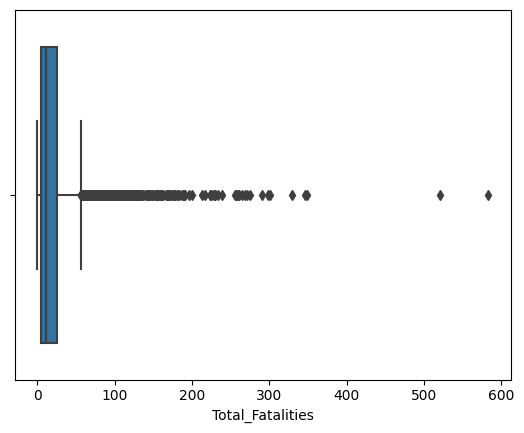

El rango intercuartil (IQR) de Total_Fatalities es 21.0
-27.5 56.5


C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_5244\323273602.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Total_Fatalities'], 25,
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_5244\323273602.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Total_Fatalities'], 75,


,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate
307,1933-04-04,12:30:00,"Off Barnegat, New Jersey",Military - U.S. Navy,NaN,Goodyear-Zeppelin U.S.S. Akron (airship),76.0,NaN,NaN,73,NaN,NaN,"While cruising at 1,600 feet off New Jersey, s...",United States,Off Barnegat,Military,other,3.0,0.039474
805,1945-10-16,11:30:00,"Near Peking, China",Military - U.S. Army Air Forces,Hankou - Peking,Curtiss-Wright C-46F-CU,59.0,55.0,4.0,59,55.0,4.0,Struck a radio transmission tower while on app...,China,Near Peking,Military,Curtiss-Wright Corporation,0.0,0.000000
1154,1950-03-12,14:50:00,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,During the approach to Runway 28 at Llandow Ai...,other,"Llandow Airport, Cardiff",Passenger,Avro Canada,3.0,0.036145
1172,1950-06-23,23:25:00,"Lake Michigan, 18 NNW of Benton Harbor, Michigan",Northwest Orient Airlines,New York City - Minneapolis - Spokan -Seattle,Douglas DC-4,58.0,55.0,3.0,58,55.0,3.0,"En route from New York to Minneapolis, the air...",United States,"Lake Michigan, 18 NNW of Benton Harbor",Passenger,Douglas Aircraft Company,0.0,0.000000
1200,1950-11-13,18:00:00,"Mt. Tete de L'Obiou, France",Curtiss-Reid Flying Services Ltd. (Canada),Rome - Paris,Douglas C-54B-1-DC,58.0,51.0,7.0,58,51.0,7.0,The aircraft drifted 50 miles off the prescrib...,France,Mt. Tete de L'Obiou,Passenger,Douglas Aircraft Company,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,2018-10-29,06:31:00,"Off Jakarta, Indonesia",Lion Air,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,189.0,181.0,8.0,189,181.0,8.0,"The airliner crashed into the Jakarta Sea, 13 ...",Indonesia,Off Jakarta,Passenger,Boeing,0.0,0.000000
4961,2019-03-10,08:44:00,"Bishoftu, Ethiopia",Ethiopian Airlines,Addis Ababa - Nairobi,Boeing 737 Max 8,157.0,149.0,8.0,157,149.0,8.0,The internationally scheduled airliner crashed...,Ethiopia,Bishoftu,Passenger,Boeing,0.0,0.000000
4972,2020-01-08,06:18:00,"Near Shahriah, Iran",Ukraine International Airlines,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,The plane took off from Tehran International A...,Iran,Near Shahriah,Passenger,Boeing,0.0,0.000000
4975,2020-05-22,14:40:00,"Karachi, Pakistan",Pakistan International Airline,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,"While landing, the aircraft scraped the runway...",Pakistan,Karachi,Passenger,Airbus,2.0,0.020202


In [15]:
# Filtramos outliers de total_fatalities

sns.boxplot(data = df, x = 'Total_Fatalities')
plt.show()

# IQR
Q1 = np.percentile(df['Total_Fatalities'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Total_Fatalities'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de Total_Fatalities es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['Total_Fatalities']<lower_lim) | (df['Total_Fatalities']>upper_lim)]

In [16]:
# Son muchos registros por lo que evaluamos la conveniencia de filtrar registros en donde tengamos un mayor número de fatalidades que de personas a bordo
df[df['Total_Fatalities'] > df['all_aboard']]

,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate


- No tenemos registros por lo que nuestros datos son consistentes.
- Por ende no tomaremos ninguna acción respecto a los outliers puesto que son datos válidos para nuestro análisis.

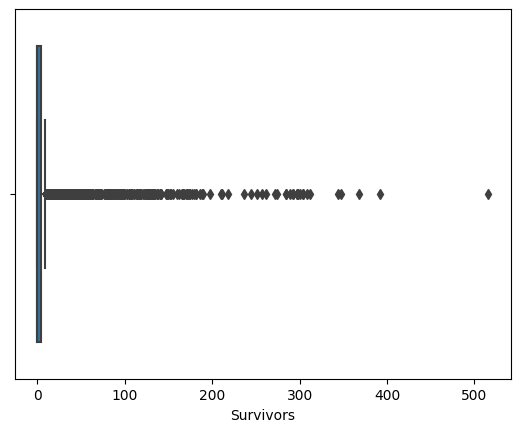

El rango intercuartil (IQR) de Survivors es 3.5
-5.25 8.75


C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_5244\3755068302.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Survivors'], 25,
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_5244\3755068302.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Survivors'], 75,


,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),41.0,0.0,41.0,17,0.0,17.0,Crashed into trees while attempting to land af...,Belgium,Tienen,Military,other,24.0,0.585366
62,1922-02-21,NaN,"Near Norfolk, Virginia",Military - U.S. Army Air Service,NaN,Dirigible Roma (airship),45.0,NaN,NaN,34,NaN,NaN,Crashed from a height of 500 ft. after experie...,United States,Near Norfolk,Military,other,11.0,0.244444
79,1923-08-27,17:30:00,"East Mallling, United Kingdom",Air Union,Paris - Berck-sur-Mer - Croydon,Farman F.60 Goliath,11.0,9.0,2.0,1,1.0,0.0,The aircraft lost an engine about 45 minutes i...,United Kingdom,East Mallling,Passenger,other,10.0,0.909091
100,1925-09-03,05:30:00,"Caldwell, Ohio",Military - U.S. Navy,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),43.0,0.0,43.0,14,0.0,14.0,The Shenandoah was flying over Southern Ohio w...,United States,Caldwell,Military,other,29.0,0.674419
110,1926-08-18,NaN,"Hurst, Kent, England",Air Union,"Lebourget, France - Croydon, England",Bleriot 155,15.0,13.0,2.0,3,2.0,1.0,The plane made a forced landing at Romney Mars...,England,"Hurst, Kent",Passenger,other,12.0,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,2019-05-05,18:30:00,"Moscow, Russia",Aeroflot Russian International Airlines,Moscow - Murmansk,Sukhoi Superjet-100-95B,78.0,73.0,5.0,41,40.0,1.0,Forty-five minutes after taking off from Mosco...,Russia,Moscow,Passenger,Sukhoi,37.0,0.474359
4970,2019-12-27,07:22:00,"Almaty, Kazakhstan",Bek Air,Almaty - Nursultan Nazabavev,Fokker 100,98.0,95.0,3.0,12,11.0,1.0,"While taking off, the tail of the plane struck...",Kazakhstan,Almaty,Passenger,Fokker,86.0,0.877551
4973,2020-02-05,18:19:00,"Istanbul, Turkey",Pegasus Airlines,Izmir - Istanbul,Boeing 737-86J,177.0,171.0,6.0,3,3.0,0.0,While landing duriing high winds and heavey ra...,Turkey,Istanbul,Passenger,Boeing,174.0,0.983051
4976,2020-08-07,19:14:00,"Calicut, India",Air India Exppress,Dubai - Calicut,Boeing 737-8HG,190.0,184.0,6.0,20,18.0,2.0,The flight IX344 suffered a runway excursion w...,India,Calicut,Passenger,Boeing,170.0,0.894737


In [17]:
# Filtramos outliers de Survivors

sns.boxplot(data = df, x = 'Survivors')
plt.show()

# IQR
Q1 = np.percentile(df['Survivors'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Survivors'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de Survivors es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['Survivors']<lower_lim) | (df['Survivors']>upper_lim)]

#### Variables Categóricas

In [18]:
categorical_data = df.select_dtypes(exclude=[np.number])
print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['Date', 'Time', 'Location', 'Airline_Operator', 'route', 'Aircraft_Type', 'Summary', 'Country', 'City', 'Category', 'Brand']


In [19]:
df.shape

(4986, 19)

Hay un total de 4986 accidentes en el datasets al cual al revisarse se notaron datos faltantes y outliers los cuales decidimos mantener para mantener por no resultar reelevantes para su análisis.

Vamos a llevar el datasets a gráficos para poder entenderlo mejor y saber que información contiene.


In [28]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year
accidentes_por_anio = df['Year'].value_counts().reset_index()

accidentes_por_anio.columns = ['Año', 'Cantidad de Accidentes']

#año con la mayor cantidad de accidentes
anio_con_mas_accidentes = accidentes_por_anio.sort_values('Cantidad de Accidentes', ascending=False).iloc[0]

#año con la menor cantidad de accidentes
anio_con_menos_accidentes = accidentes_por_anio.sort_values('Cantidad de Accidentes').iloc[0]



print(anio_con_mas_accidentes)
print(anio_con_menos_accidentes)

Año                       1946
Cantidad de Accidentes      87
Name: 0, dtype: int64
Año                       1908
Cantidad de Accidentes       1
Name: 110, dtype: int64


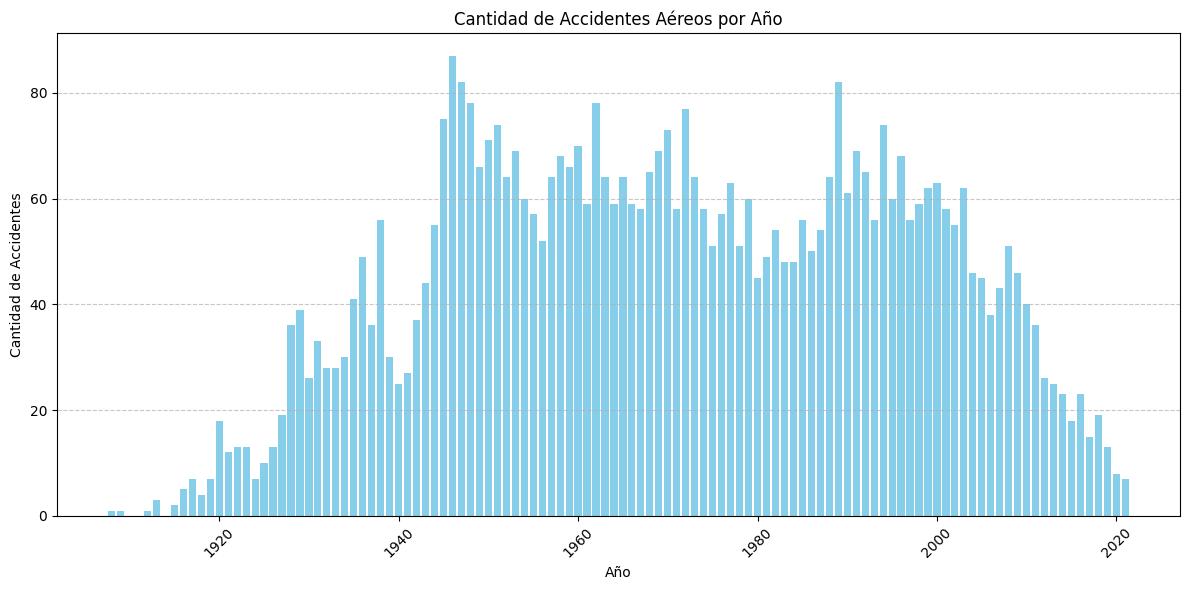

In [25]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(accidentes_por_anio['Año'], accidentes_por_anio['Cantidad de Accidentes'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes Aéreos por Año')
plt.xticks(rotation=45)  # Rotar los años en el eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se observa la cantidad de accidentes por año que hubo a la vez se puede ver el año en q mas accidentes fueron notificados en este caso 1946 y el año que menos accidentes 1908.

En cuanto a los diferentes países¿ Cuales fueron los que mas accidentes registran?

Columna Category:

¿Qué categoría posee mayor cantidad de accidentes?

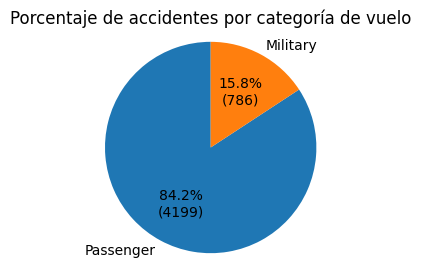

In [35]:
# Calculamos el recuento de accidentes por categoría
category_counts = df['Category'].value_counts()

# Creamos el gráfico circular
plt.figure(figsize=(3, 3))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*category_counts.sum())})', startangle=90)
plt.title('Porcentaje de accidentes por categoría de vuelo')
plt.axis('equal')
plt.show()

De 4986 accidentes registrados 4199 son vuelos militares 786 vuelos comerciales, observamos que los vuelos no militares poseen mayor cantidad de accidentes a lo largo de la historia.

Columna Country:

Paises con mayorr cantidad de accidentes 

In [11]:
filtered_data = df[df['Country'] != 'other']

# recuento de accidentes por país (tomamos los 10 más representativos)
country_counts = filtered_data['Country'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
top_countries = pd.DataFrame({'Country': country_counts.index, 'Accident Count': country_counts.values})


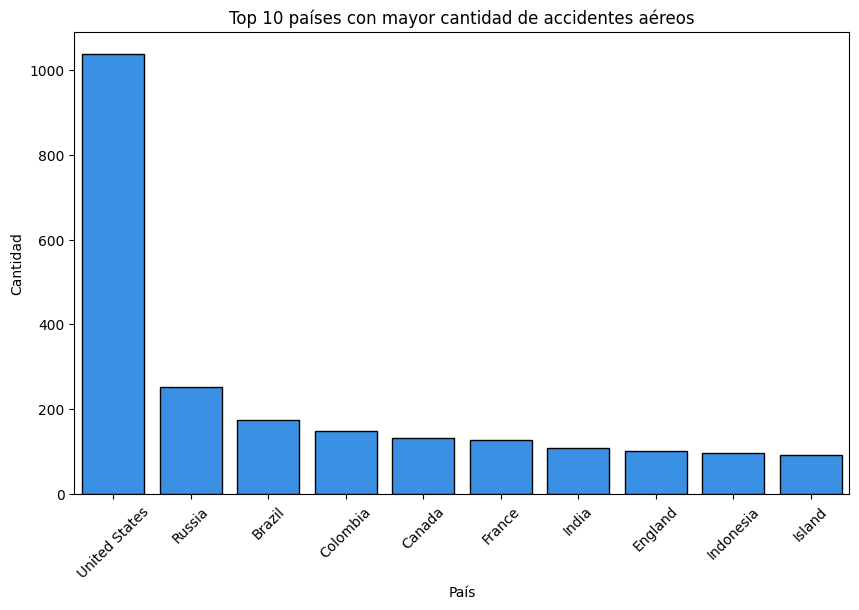

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Accident Count', data=top_countries, color='#1E90FF',edgecolor='black')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

 Estados Unidos es el país con mayor cantidad de accidentes históricos

In [14]:
registros_por_pais = df['Country'].value_counts().reset_index()
registros_por_pais.columns = ['País', 'Cantidad de Registros']

registros_por_pais = registros_por_pais.sort_values('Cantidad de Registros')
paises_con_menos_registros = registros_por_pais.head(10)



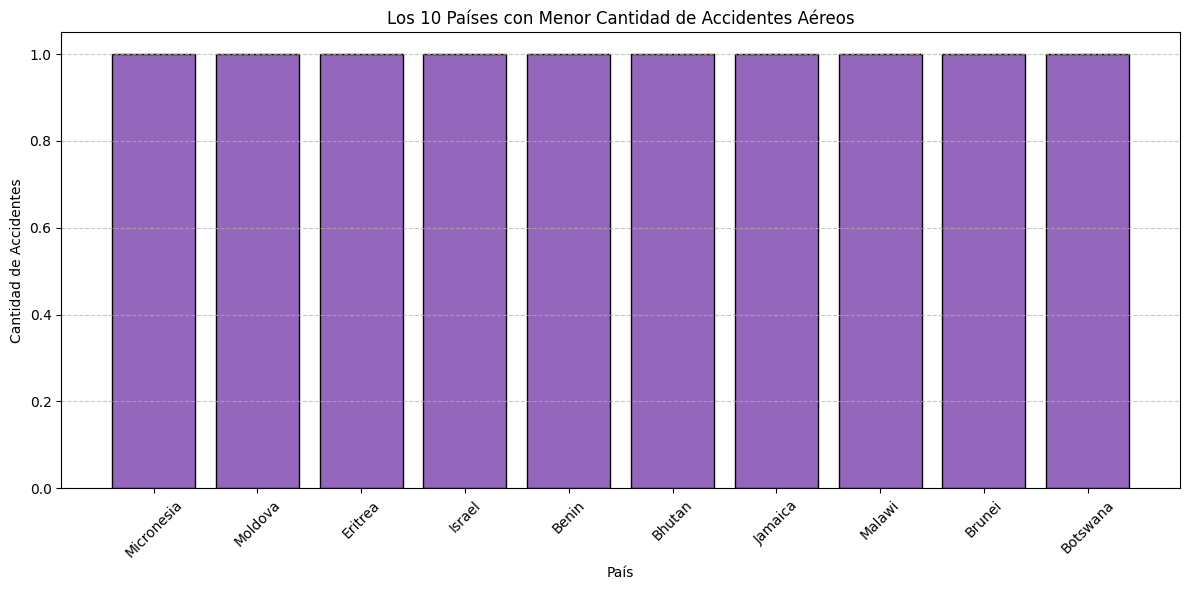

In [37]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(paises_con_menos_registros['País'], paises_con_menos_registros['Cantidad de Registros'], color='#9467bd',edgecolor='black')
plt.ylabel('Cantidad de Accidentes')
plt.xlabel('País')
plt.title('Los 10 Países con Menor Cantidad de Accidentes Aéreos')
plt.xticks(rotation=45)  # Rotar los nombres de los países para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Asi como hicimos el gráfico de de los píses con mayor número de accidentes aca tenemos los que menor cantidad de accidentes presentan.

Columna Brand:

¿Qué marca(Brand) tuvo la mayor cantidad de fatalidades?

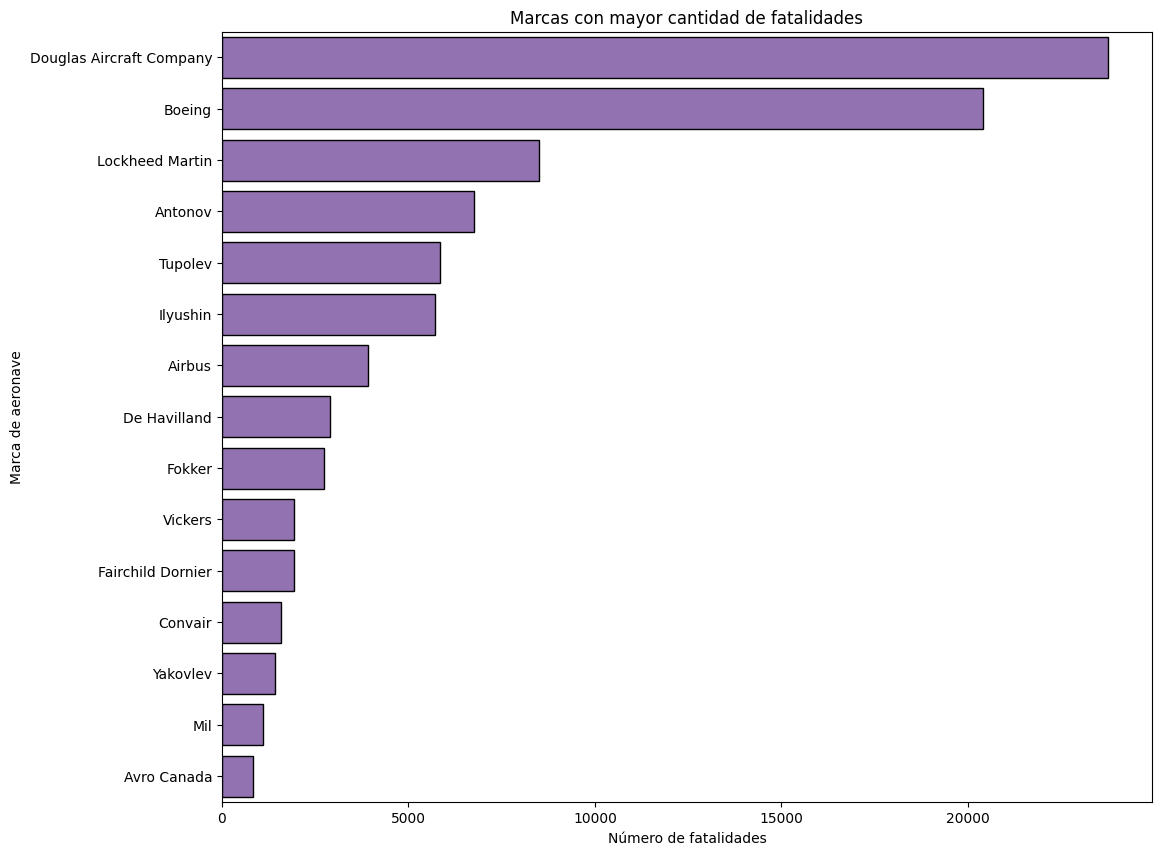

In [36]:
# Filtramos 'other' del recuento
data_filtered = df[df['Brand'] != 'other']

# Agrupamos por tipo de marca
fatalities_by_brand = data_filtered.groupby('Brand')['Total_Fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_brand_fatalities = fatalities_by_brand.nlargest(15, 'Total_Fatalities')

# Graficamos
plt.figure(figsize=(12, 10))
sns.barplot(x='Total_Fatalities', y='Brand', data=top_brand_fatalities, color='#9467bd',edgecolor='black')
plt.xlabel('Número de fatalidades')
plt.ylabel('Marca de aeronave')
plt.title('Marcas con mayor cantidad de fatalidades')
plt.show()


Observamos que Douglas Aircraft Company presenta la mayor cantidad de fatalidades le sigue Boing y Lockeheed Martin.

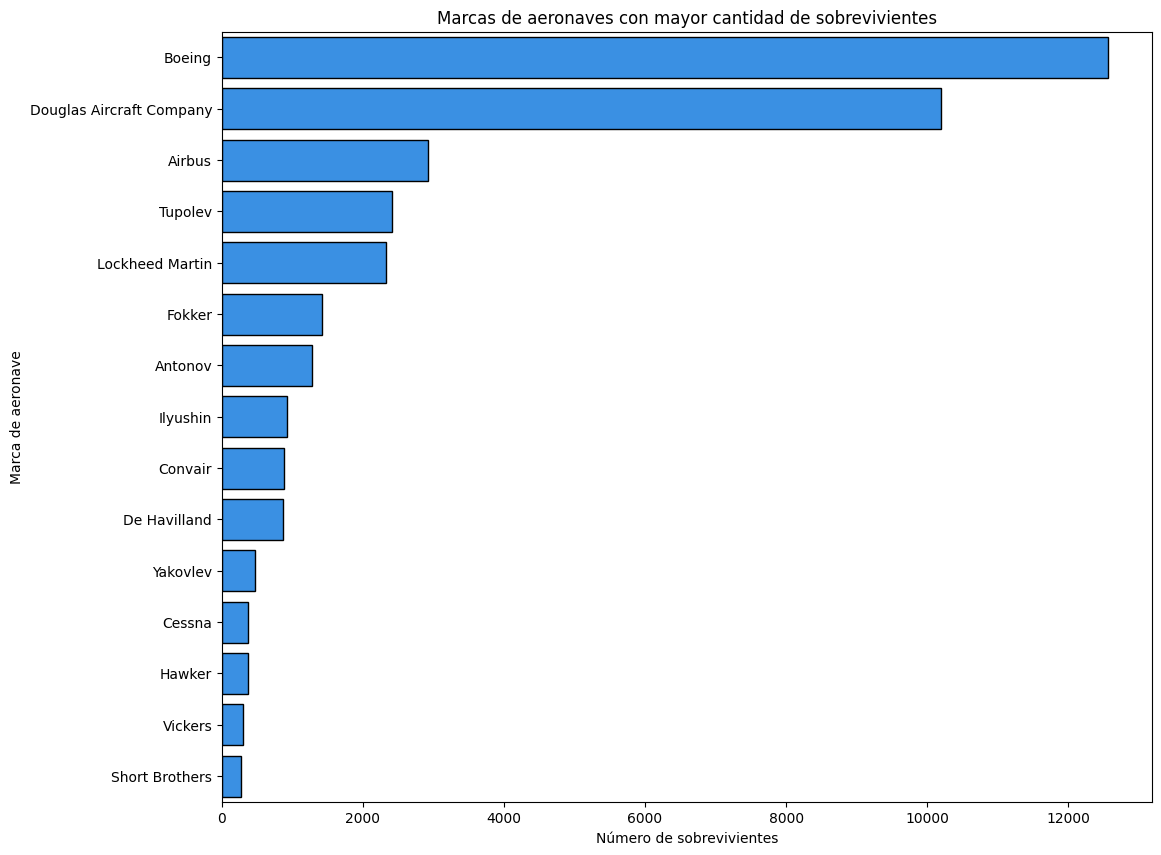

In [35]:
# Filtramos 'other' del recuento
data_filtered = df[df['Brand'] != 'other']

# Calculamos los sobrevivientes por marca
survivors_by_brand = data_filtered.groupby('Brand')['Survivors'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_brands_survivors = survivors_by_brand.nlargest(15, 'Survivors')

# Graficamos
plt.figure(figsize=(12, 10))
sns.barplot(x='Survivors', y='Brand', data=top_brands_survivors, color='#1E90FF',edgecolor='black')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Marca de aeronave')
plt.title('Marcas de aeronaves con mayor cantidad de sobrevivientes')
plt.show()

Aca se pueden ver las marcas de aviones donde se registran menos cantidad de accidentes.

 Qué tipo de aeronave presenta mas registros de fatalidades?

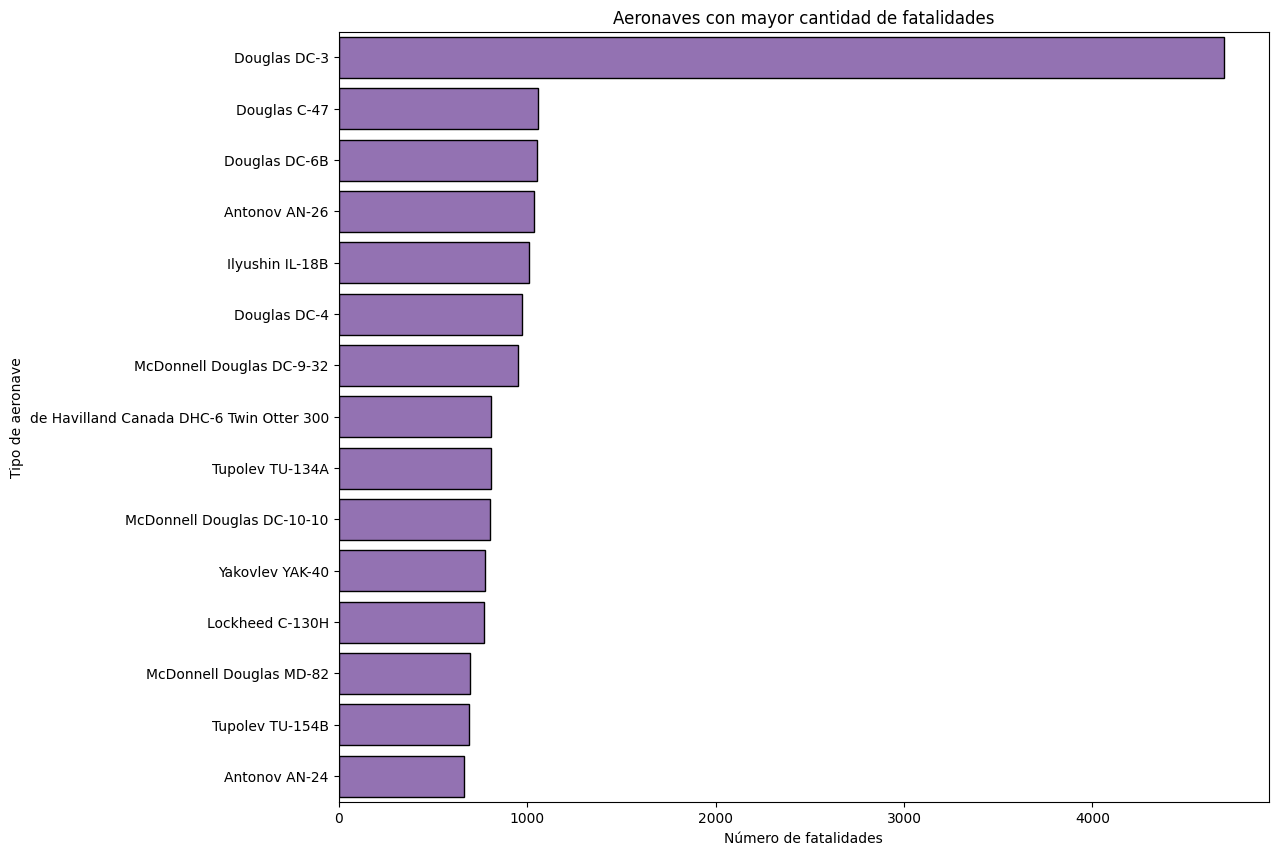

In [34]:
# Agrupamos por tipo de aeronave
fatalities_by_aircraft = df.groupby('Aircraft_Type')['Total_Fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_aircraft_fatalities = fatalities_by_aircraft.nlargest(15, 'Total_Fatalities')

# Graficamos
plt.figure(figsize=(12, 10))
sns.barplot(x='Total_Fatalities', y='Aircraft_Type', data=top_aircraft_fatalities, color='#9467bd',edgecolor='black')
plt.xlabel('Número de fatalidades')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de fatalidades')
plt.show()

Columna route:

¿Hay alguna ruta que presente mas de un registro?

In [28]:

# Filtra los registros duplicados basados en la columna 'route'
rutas_con_mas_de_un_accidente = df[df['route'].notna()].copy()
rutas_con_mas_de_un_accidente = rutas_con_mas_de_un_accidente[rutas_con_mas_de_un_accidente.duplicated(subset=['route'], keep=False)]

# Cuenta la cantidad de accidentes por ruta
conteo_accidentes_por_ruta = rutas_con_mas_de_un_accidente['route'].value_counts().reset_index()
conteo_accidentes_por_ruta.columns = ['Ruta', 'Cantidad de Accidentes']

# Filtra las rutas con más de un accidente
rutas_con_mas_de_un_accidente = conteo_accidentes_por_ruta[conteo_accidentes_por_ruta['Cantidad de Accidentes'] > 1]

# Ordena las rutas por cantidad de accidentes
rutas_con_mas_de_un_accidente = rutas_con_mas_de_un_accidente.sort_values('Cantidad de Accidentes', ascending=False)

# Tomar las 10 primeras rutas
top_10_rutas_con_mas_accidentes = rutas_con_mas_de_un_accidente.head(10)


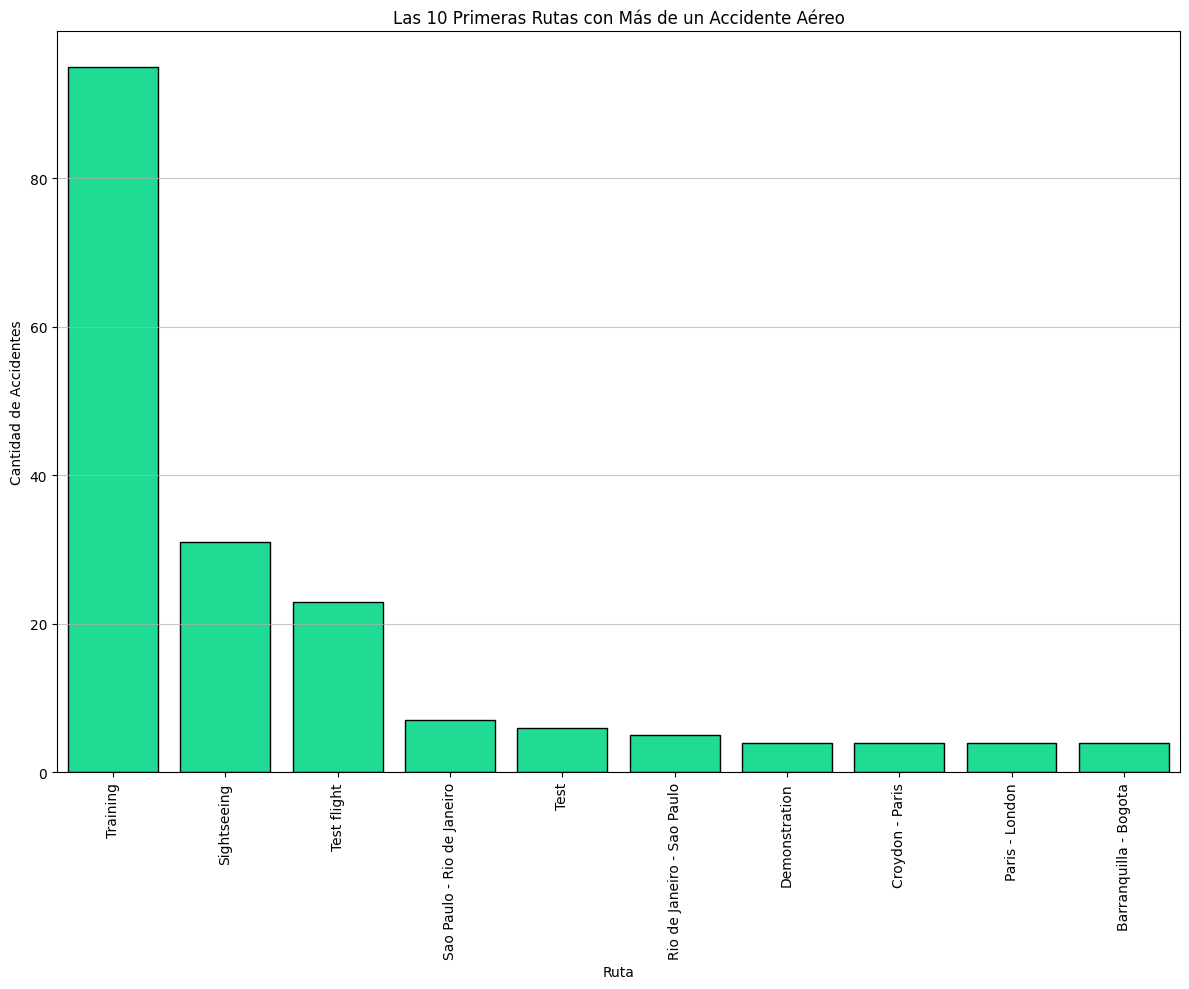

In [31]:
# Crea un gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x='Ruta', y='Cantidad de Accidentes', data=top_10_rutas_con_mas_accidentes, color='#00FA9A',edgecolor='black')
plt.xlabel('Ruta')
plt.ylabel('Cantidad de Accidentes')
plt.title('Las 10 Primeras Rutas con Más de un Accidente Aéreo')
plt.xticks(rotation=90)  # Rotar los nombres de las rutas para mejor legibilidad
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()
plt.show()



Se puede ver como las rutas 'Training' llamadas de entrenamiento son las que presentan mas registros, mas atras 4to y 6to puesto se puede ver como aparece Brasil con 2 rutas impportantes San Pablo-Río y Río-San Pablo.

Columna Airline Operator:

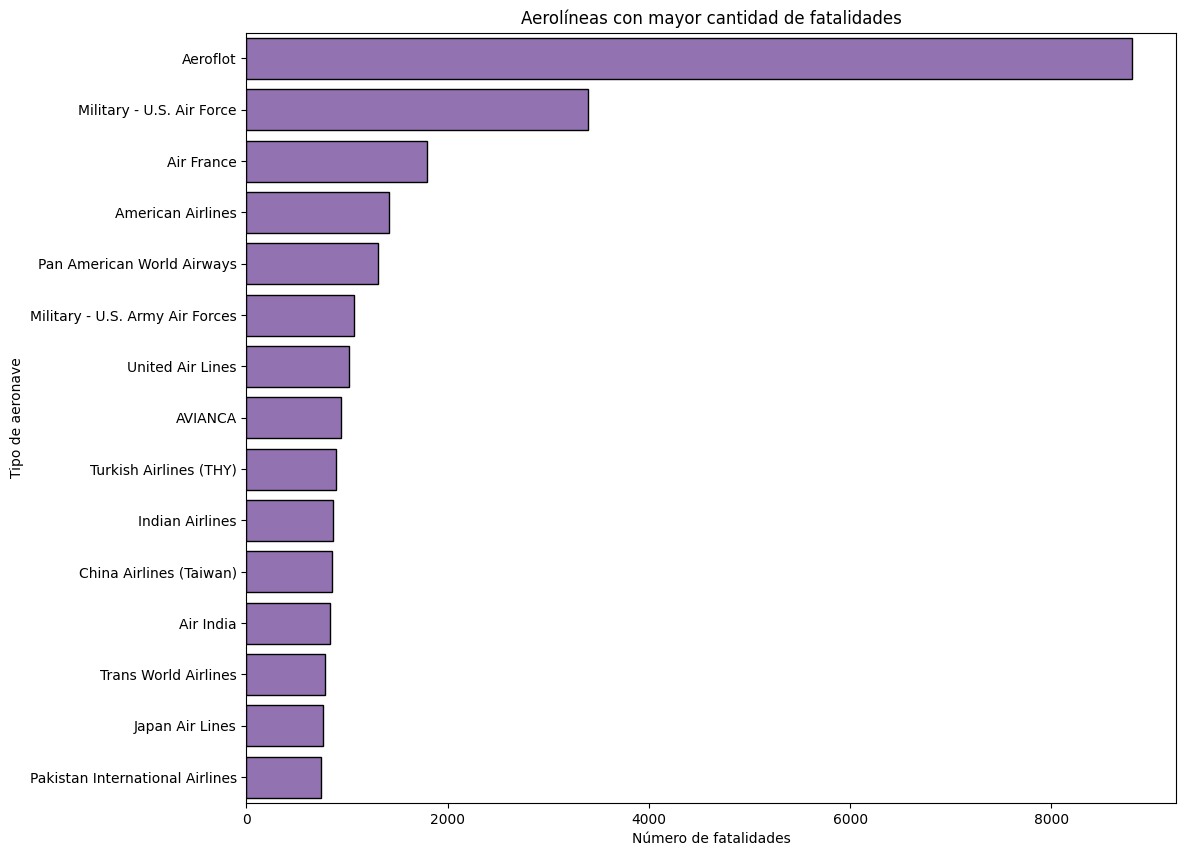

In [32]:
# Calculamos las fatalidades por aeronave
fatalities_by_airline = df.groupby('Airline_Operator')['Total_Fatalities'].sum().reset_index()

# Dejamos solamente las 15 con mayor cantidad de fatalidades
top_airline_fatalities = fatalities_by_airline.nlargest(15, 'Total_Fatalities')

# Graficamos
plt.figure(figsize=(12, 10))
sns.barplot(x='Total_Fatalities', y='Airline_Operator', data=top_airline_fatalities, color='#9467bd',edgecolor='black')
plt.xlabel('Número de fatalidades')
plt.ylabel('Tipo de aeronave')
plt.title('Aerolíneas con mayor cantidad de fatalidades')
plt.show()

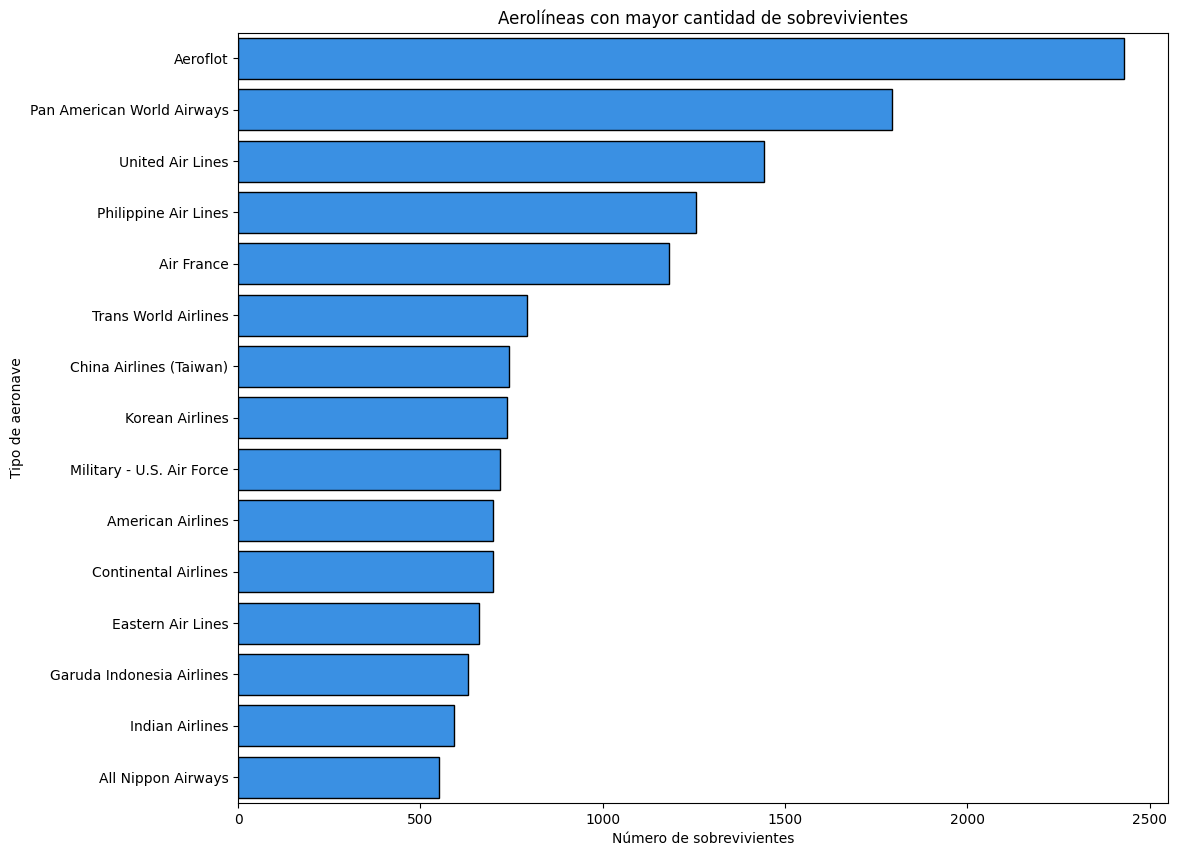

In [33]:
# Calculamos los sobrevivientes por aeronave
survivors_by_airline = df.groupby('Airline_Operator')['Survivors'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_airline_survivors = survivors_by_airline.nlargest(15, 'Survivors')

# Graficamos
plt.figure(figsize=(12, 10))
sns.barplot(x='Survivors', y='Airline_Operator', data=top_airline_survivors, color='#1E90FF',edgecolor='black')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aerolíneas con mayor cantidad de sobrevivientes')
plt.show()

Pese a tener la cantidad mayor de accidentes y fatalidades, Aeroflot posee el mayor número de sobrevivientes

## Con el análisis anterior podemos realizarnos algunas preguntas:

Con respecto a las rutas: ¿Que tipo de aviones fueron los que tuvieron los accidentes? 

In [51]:
top_10_rutas = df['route'].value_counts().head(10).index.tolist()
accidentes_top_10_rutas = df[df['route'].isin(top_10_rutas)]

informacion_accidentes = accidentes_top_10_rutas[['Date', 'route', 'Aircraft_Type', 'Airline_Operator', 'Summary']]
informacion_accidentes.head(10)


,Date,route,Aircraft_Type,Airline_Operator,Summary
0,1908-09-17,Demonstration,Wright Flyer III,Military - U.S. Army,"During a demonstration flight, a U.S. Army fly..."
2,1912-07-12,Test flight,Dirigible,Military - U.S. Navy,First U.S. dirigible Akron exploded just offsh...
65,1922-04-08,Test,NaN,NaN,Aboard were all workers taking part in a fligh...
78,1923-05-14,Paris - London,Farman F-60 Goliath,Grands Express Aeriens (Air Union),Broke-up in mid air after suffering structural...
112,1926-10-02,Paris - London,Bleriot 155,Air Union,"After an engine fire, the pilot attempts to ma..."
126,1927-09-17,Sightseeing,Fokker F-VII,Reynolds Airways,The sightseeing plane took off and rose to 400...
132,1927-11-16,Tallinn - Helsinki,Junkers F-13,Aero O-Y,Crashed in the gulf of Finland and never found.
135,1927-12-31,Test flight,Latécoère 23 (flying boat),Latecoere Airlines,Suffered structural failure at an altitude of ...
150,1928-07-10,Tallinn - Helsinki,Junkers F-13,Aero O-Y,Crashed under unknown circumstances
166,1928-12-03,Sightseeing,Dornier Wal,Syndicato Condor,The seaplane took off form the bay and narrowl...


In [50]:
# Filtra los datos para obtener los accidentes relacionados con las marcas más seguras
marcas_seguras = informacion_accidentes[informacion_accidentes['Airline_Operator'].isin(['Boeing', 'Douglas Aircraft Company'])]

# Filtra los datos para obtener los accidentes relacionados con las marcas que registran más fatalidades
marcas_fatales = informacion_accidentes[informacion_accidentes['Aircraft_Type'].isin(['Douglas DC-3', 'Douglas DC-47'])]

# Muestra los resultados
print("Accidentes relacionados con marcas más seguras:")
marcas_seguras

print("\nAccidentes relacionados con marcas que registran más fatalidades:")
marcas_fatales

Accidentes relacionados con marcas más seguras:

Accidentes relacionados con marcas que registran más fatalidades:


,Date,route,Aircraft_Type,Airline_Operator,Summary
1260,1951-09-08,Sao Paulo - Rio de Janeiro,Douglas DC-3,VASP,Crashed into a houses shortly after taking off...
1434,1954-02-25,Test flight,Douglas DC-3,Indian Airlines,The test flight crashed after attempting to de...
1466,1954-09-12,Sao Paulo - Rio de Janeiro,Douglas DC-3,Cruzeiro,The plane was attemping to return to the Rio d...
1615,1957-05-13,Training,Douglas DC-3,Indian Airlines,During a training exercise the aircraft approa...
1685,1958-06-04,Training,Douglas DC-3,Capital Airlines,Following the trainee-pilot's failure to maint...
1887,1961-08-06,Sightseeing,Douglas DC-3,Malev Hungarian Airlines,The aircraft crashed between a row of houses w...
1959,1962-07-30,Training,Douglas DC-3,Air France,"After rotation, the airplane encountered diffi..."


Podemos ver que no hay registro de accidentes con el tipo de avión que menos fatalidades presenta como Boing y Douglas Aircraft Company, pero si se puede ver que el Douglas DC-3 se repíte en los registros de las rutas con mas accidentes. 

¿Porque la aerolínea con mayor cantidad de muertes es la que tiene mayor cantidad de sobrevivientes?

In [53]:
top_10_aerolineas = df['Airline_Operator'].value_counts().head(10).index.tolist()

accidentes_top_10_aerolineas = df[df['Airline_Operator'].isin(top_10_aerolineas)]

resumen_aerolineas = accidentes_top_10_aerolineas.groupby('Airline_Operator').agg({
    'Date': 'count',
    'Survivors': 'sum',
    'Total_Fatalities': 'sum',
    'Brand': 'first' 
}).reset_index()

resumen_aerolineas.columns = ['Airline_Operator', 'Accidentes', 'Sobrevivientes', 'Fallecidos', 'Marca']


resumen_aerolineas

,Airline_Operator,Accidentes,Sobrevivientes,Fallecidos,Marca
0,Aeroflot,253,2429.0,8802,Tupolev
1,Air France,73,1181.0,1797,other
2,American Airlines,37,700.0,1422,Lockheed Martin
3,China National Aviation Corporation,38,87.0,333,Viking Air
4,Deutsche Lufthansa,63,116.0,387,Junkers
5,Military - U.S. Air Force,141,718.0,3395,Douglas Aircraft Company
6,Military - U.S. Army Air Forces,43,30.0,1070,Douglas Aircraft Company
7,Pan American World Airways,41,1794.0,1303,Sikorsky Aircraft Corporation
8,US Aerial Mail Service,35,3.0,39,De Havilland
9,United Air Lines,44,1442.0,1019,Boeing


La razón es simple al ser la aerolinea con mas accidentes registrados 253, va a ser la que presente mas muertes y a su vez sobrevivientes. Tambien podemos ver que Tupolev la marca con la que se registran los accidentes se encuentra dentro de las primeras 5 con mas accidentes.

¿Cúales son las marcas que las aerolíneas mas usan? 

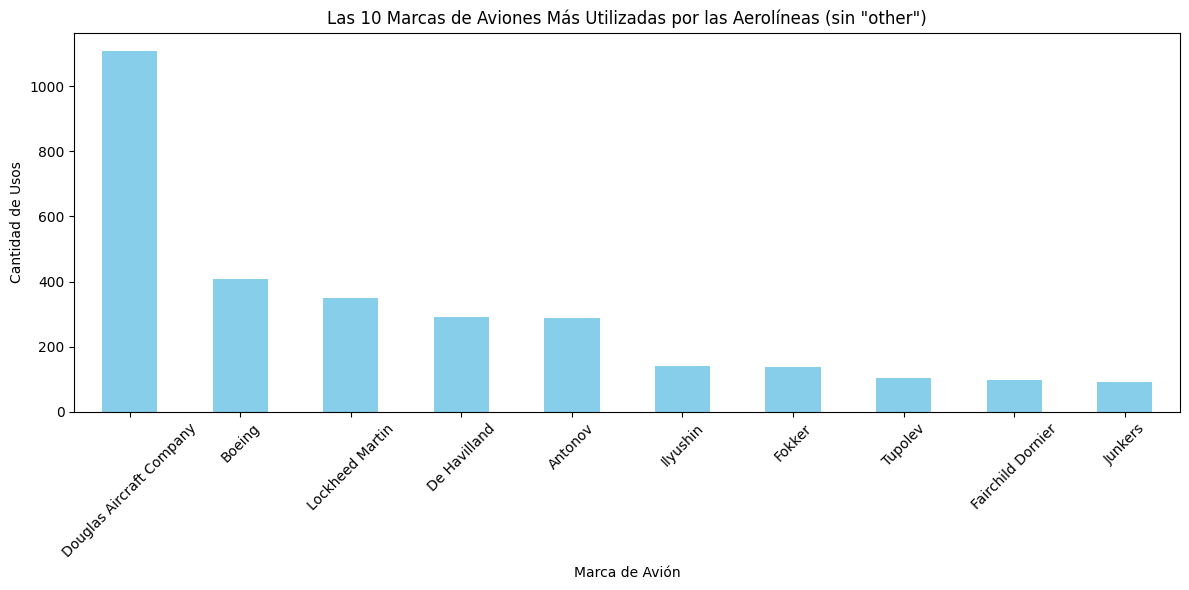

In [64]:
marcas_utilizadas = df[df['Brand'] != 'other']['Brand']
marcas_mas_utilizadas = marcas_utilizadas.value_counts().head(10)


plt.figure(figsize=(12, 6))
marcas_mas_utilizadas.plot(kind='bar', color='skyblue')
plt.title('Las 10 Marcas de Aviones Más Utilizadas por las Aerolíneas (sin "other")')
plt.xlabel('Marca de Avión')
plt.ylabel('Cantidad de Usos')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

Las marcas mas utilizadas son a su ver las que presentan menos accidentes.

¿Las aerolíneas más seguras tenían las marcas más seguras?

In [69]:
lista_nombres_aerolineas = top_airline_survivors['Airline_Operator'].tolist()
lista_nombres_aerolineas

['Aeroflot',
 'Pan American World Airways',
 'United Air Lines',
 'Philippine Air Lines',
 'Air France',
 'Trans World Airlines',
 'China Airlines (Taiwan)',
 'Korean Airlines',
 'Military - U.S. Air Force',
 'American Airlines',
 'Continental Airlines',
 'Eastern Air Lines',
 'Garuda Indonesia Airlines',
 'Indian Airlines',
 'All Nippon Airways']

In [67]:
lista_nombres_marcas = top_brands_survivors['Brand'].tolist()
lista_nombres_marcas

['Boeing',
 'Douglas Aircraft Company',
 'Airbus',
 'Tupolev',
 'Lockheed Martin',
 'Fokker',
 'Antonov',
 'Ilyushin',
 'Convair',
 'De Havilland',
 'Yakovlev',
 'Cessna',
 'Hawker',
 'Vickers',
 'Short Brothers']

In [70]:
tabla_cruzada = pd.crosstab(df['Airline_Operator'], df['Brand'], margins=True, margins_name="Total")

# Filtramos la tabla cruzada por las aerolíneas y marcas más seguras
tabla_cruzada_filtrada = tabla_cruzada.loc[lista_nombres_aerolineas, lista_nombres_marcas]
tabla_cruzada_filtrada

Brand,Boeing,Douglas Aircraft Company,Airbus,Tupolev,Lockheed Martin,Fokker,Antonov,Ilyushin,Convair,De Havilland,Yakovlev,Cessna,Hawker,Vickers,Short Brothers
Airline_Operator,,,,,,,,,,,,,,,
Aeroflot,1,4,0,57,0,0,66,68,0,0,23,0,0,0,0
Pan American World Airways,25,3,0,0,6,0,0,0,0,0,0,1,0,0,0
United Air Lines,15,25,0,0,0,0,0,0,1,0,0,0,0,2,0
Philippine Air Lines,2,13,2,0,0,5,0,0,0,2,0,0,4,0,0
Air France,5,16,5,0,6,0,0,0,0,0,0,0,0,1,0
Trans World Airlines,9,0,0,0,7,0,0,0,1,0,0,0,0,0,0
China Airlines (Taiwan),7,3,2,0,0,0,0,0,0,0,0,0,0,0,0
Korean Airlines,6,1,1,0,0,2,0,0,0,0,0,0,0,0,0
Military - U.S. Air Force,33,34,0,0,42,0,0,0,7,1,0,0,0,0,0


- Podemos afirmar en base a esta tabla que las aerolineas más seguras, históricamente tuvieron dentro de su flota Boeing y Douglas principalmente
- Esto indica que las aerolíneas más seguras compraron las aerolíneas más seguras. No podríamos atribuir la causa de los accidentes al tipo de aeronave

¿Cúal es el primer vuelo registrado en el dataset y cúal el último?

In [73]:
fecha_primero = df['Date'].min()
fecha_ultimo = df['Date'].max()

# registro del primer vuelo 
primer_vuelo = df[df['Date'] == fecha_primero]

# registro del último vuelo registrado
ultimo_vuelo = df[df['Date'] == fecha_ultimo]

primer_vuelo


,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,Fort Myer,Military,Wright Brothers,1.0,0.5


In [72]:
ultimo_vuelo

,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate
4985,2021-07-06,15:00:00,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,28.0,22.0,6.0,28,22.0,6.0,The passenger plane crashed into the top of a ...,Russia,Palana,Passenger,Antonov,0.0,0.0


¿Podemos afirmar que la cantidad de accidentes disminuye a medida que avanzan los años?

In [76]:
# Extraemos el año de la columna 'date'
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('Year').size().reset_index(name='Cantidad de accidentes')

# Calculamos la media móvil de 10 sesiones
accidents_by_year['Media móvil'] = accidents_by_year['Cantidad de accidentes'].rolling(window=10).mean()


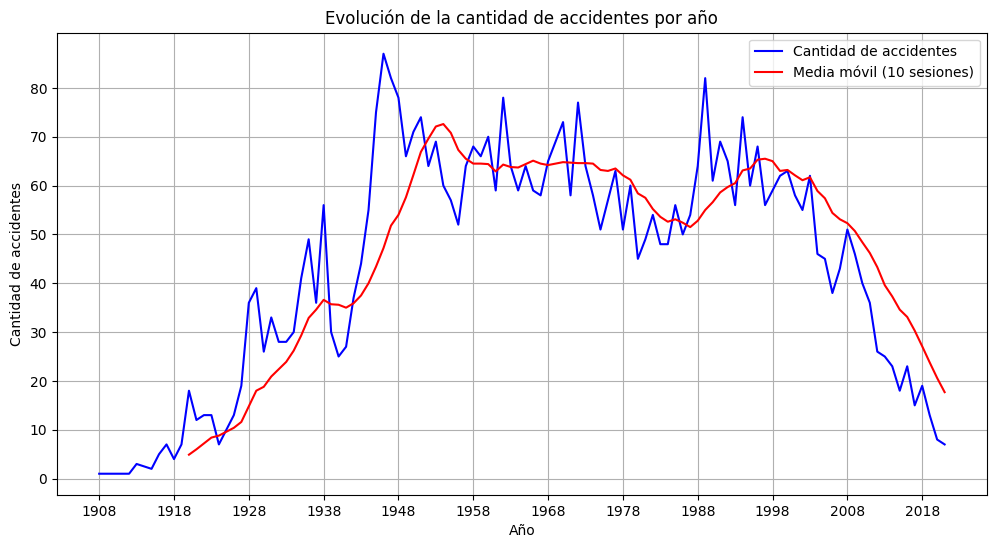

In [78]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year, x='Year', y='Cantidad de accidentes', color='blue', label='Cantidad de accidentes')
sns.lineplot(data=accidents_by_year, x='Year', y='Media móvil', color='red', label='Media móvil (10 sesiones)')
plt.xticks(range(min(accidents_by_year['Year']), max(accidents_by_year['Year'])+1, 10))
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

plt.grid(True)


plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.title('Evolución de la cantidad de accidentes por año')


plt.show()

- Podemos observar que a partir de 1908 la tendencia comenzó fuertemente alcista hasta llegar a 1946 donde tuvimos el máximo histórico
- Hay una tendencia a la baja a partir de 1990
- Para los últimos años del dataset, la cantidad de accidentes se encuentra en mínimos históricos
- Podemos afirmar que en los últimos años los vuelos resultaron más seguros que durante mediados del siglo XX

## Desarrollo de los KPI'S pedidos:

- 1er KPI: Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.

(Suma total de fallecidos en el período de tiempo / Suma total de accidentes en el período de tiempo)

In [82]:
# Supongamos que tienes un DataFrame llamado 'accidentes' con la estructura mencionada antes.

# Crear una lista para almacenar las tasas de fatalidad por década
tasas_fatalidad_por_decada = []

# Definir el rango de años para el bucle (1908 a 2021)
inicio_anio = 1908
fin_anio = 2021  # Ajusta este valor al último año disponible en tu DataFrame

# Iterar a través de las décadas
for decada_inicio in range(inicio_anio, fin_anio, 10):
    decada_fin = min(decada_inicio + 9, fin_anio)  # Calcular el final de la década, asegurándote de no superar el último año
    # Filtrar los datos para obtener los accidentes en la década actual
    accidentes_decada = df[(df['Date'] >= f'{decada_inicio}-01-01') & (df['Date'] <= f'{decada_fin}-12-31')]
    # Calcular la suma total de accidentes en la década
    suma_total_accidentes = accidentes_decada.shape[0]
    # Calcular la suma total de fallecidos de la tripulación en la década
    suma_fallecidos_tripulacion = accidentes_decada['Crew_Fatalities'].sum()
    # Calcular la tasa de fatalidad de la tripulación para la década actual en forma de porcentaje
    tasa_fatalidad_decada = (suma_fallecidos_tripulacion / suma_total_accidentes) 
    # Almacenar la tasa de fatalidad en la lista
    tasas_fatalidad_por_decada.append((f'{decada_inicio}-{decada_fin}', tasa_fatalidad_decada))

# Imprimir las tasas de fatalidad por década
for decada, tasa in tasas_fatalidad_por_decada:
    print(f'Tasa de fatalidad en la década {decada}: {tasa:.2f}%')


Tasa de fatalidad en la década 1908-1917: 2.10%
Tasa de fatalidad en la década 1918-1927: 1.72%
Tasa de fatalidad en la década 1928-1937: 1.86%
Tasa de fatalidad en la década 1938-1947: 3.11%
Tasa de fatalidad en la década 1948-1957: 3.73%
Tasa de fatalidad en la década 1958-1967: 4.14%
Tasa de fatalidad en la década 1968-1977: 4.01%
Tasa de fatalidad en la década 1978-1987: 3.59%
Tasa de fatalidad en la década 1988-1997: 3.26%
Tasa de fatalidad en la década 1998-2007: 3.31%
Tasa de fatalidad en la década 2008-2017: 3.39%
Tasa de fatalidad en la década 2018-2021: 3.98%


- 2do KPI: Tasa anual de mortalidad. Objetivo: reducir en un 5% la tasa, año a año.

In [3]:
df

,Date,Time,Location,Airline_Operator,route,Aircraft_Type,all_aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Summary,Country,City,Category,Brand,Survivors,Survival_Rate
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,Fort Myer,Military,Wright Brothers,1.0,0.500000
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,Juvisy-sur-Orge,Passenger,Wright Brothers,0.0,0.000000
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,Atlantic City,Military,other,0.0,0.000000
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,"Victoria, British Columbia",Passenger,other,0.0,0.000000
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,other,Over the North Sea,Military,other,6.0,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5,4.0,1.0,The sightseeing helicopter crashed after missi...,United States,Near Butte,Passenger,Eurocopter,1.0,0.166667
4982,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NaN,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11,7.0,4.0,"While on final approach, in poor weather condi...",Nigeria,Near Kaduna,Military,Viking Air,0.0,0.000000
4983,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,12,11.0,1.0,The plane was carrying military personnel and ...,Myanmar,Near Pyin Oo Lwin,Military,Beechcraft,2.0,0.142857
4984,2021-07-04,11:30:00,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96.0,88.0,8.0,50,NaN,NaN,"While attempting to land at Jolo Airport, the ...",Philippines,"Patikul, Sulu",Military,Lockheed Martin,46.0,0.479167


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
yearly_summary = df.groupby('Year').agg({'Total_Fatalities': 'sum', 'all_aboard': 'sum'})

yearly_summary['Mortality_Rate'] = (yearly_summary['Total_Fatalities'] / yearly_summary['all_aboard'])
yearly_summary.reset_index(inplace=True)

yearly_summary

,Year,Total_Fatalities,all_aboard,Mortality_Rate
0,1908,1,2.0,0.500000
1,1909,1,1.0,1.000000
2,1912,5,5.0,1.000000
3,1913,43,49.0,0.877551
4,1915,36,60.0,0.600000
...,...,...,...,...
106,2017,214,245.0,0.873469
107,2018,874,1239.0,0.705408
108,2019,305,432.0,0.706019
109,2020,355,703.0,0.504979


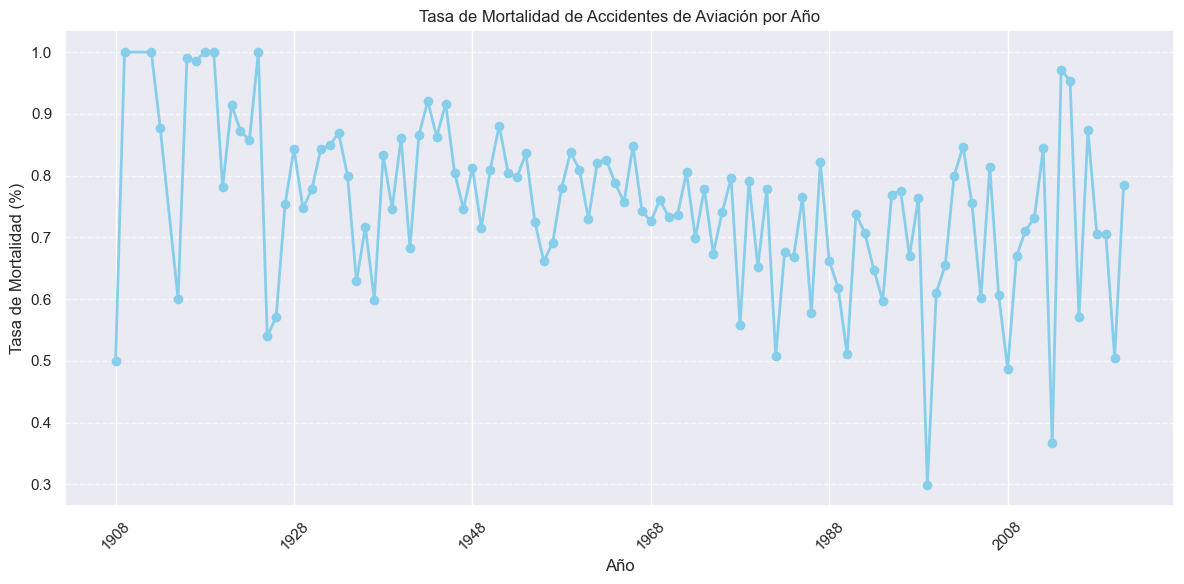

In [11]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(yearly_summary['Year'], yearly_summary['Mortality_Rate'], marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Año')
plt.ylabel('Tasa de Mortalidad (%)')
plt.title('Tasa de Mortalidad de Accidentes de Aviación por Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los años en intervalos de 20 años
plt.xticks(range(yearly_summary['Year'].min(), yearly_summary['Year'].max() + 1, 20), rotation=45)

plt.tight_layout()

# Mostrar el gráfico
plt.show()